# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


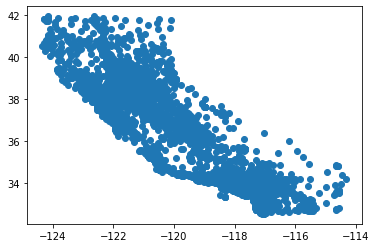

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude']);

In [5]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [6]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


## Kolay gelsin!

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [10]:
WCSS = []

for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=53)
    model.fit(X)
    WCSS.append(model.inertia_) 

In [11]:
WCSS

[101042.11682271687,
 73388.62027986844,
 56517.9635076781,
 47170.05196821817,
 39488.78355531115,
 34708.88016741259,
 30738.413987180626,
 27737.07701251467]

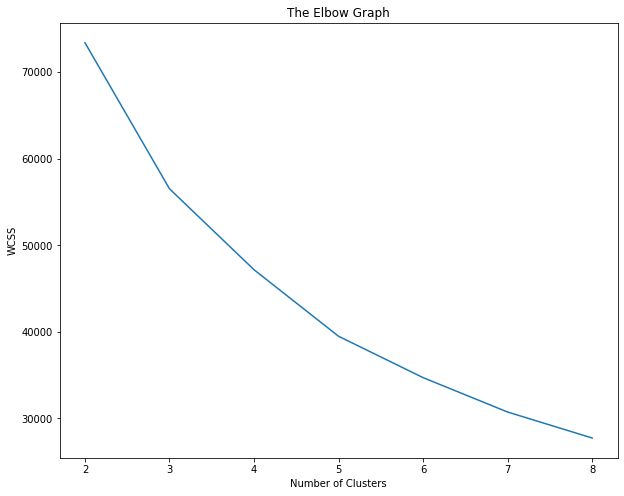

In [14]:
plt.figure(figsize=(10,8))
plt.plot(range(2,9), WCSS[1:])
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

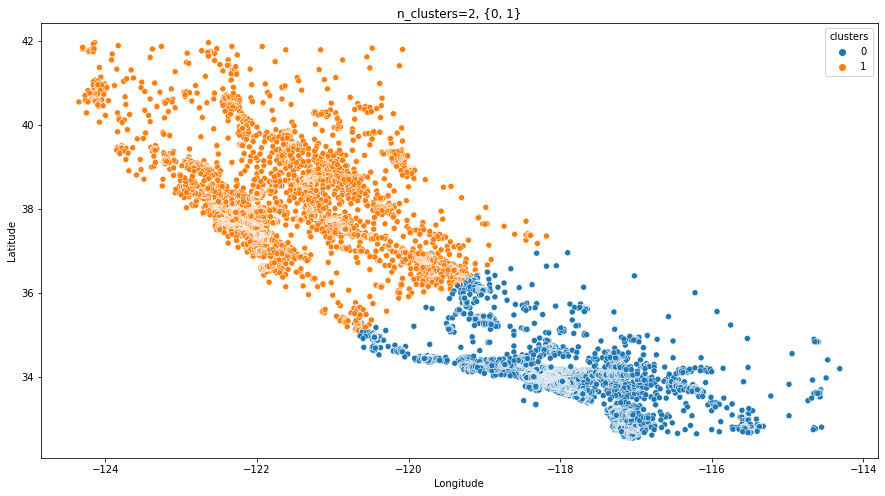

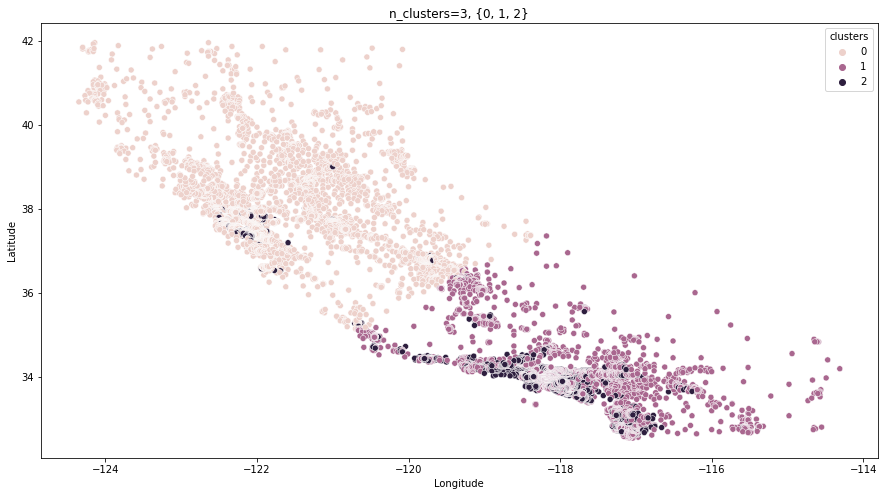

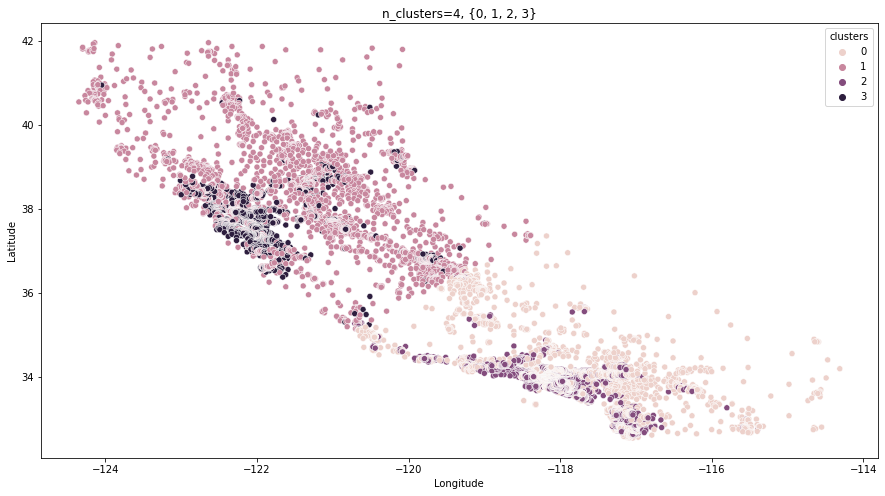

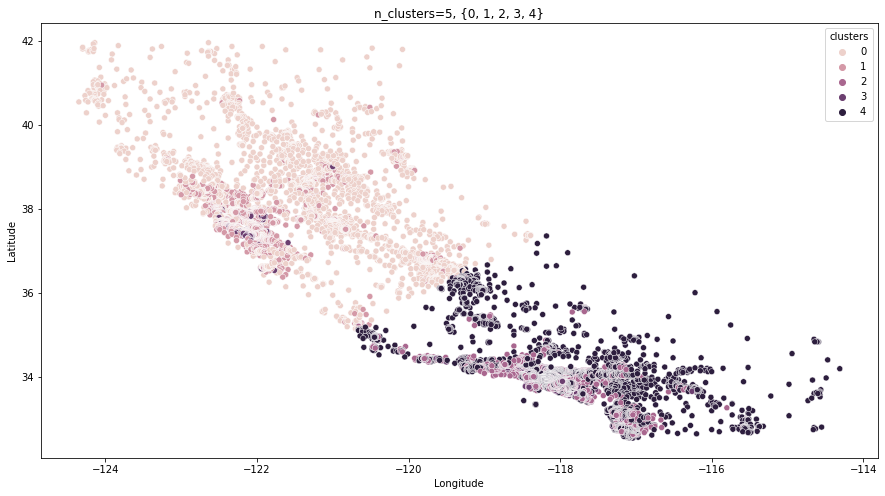

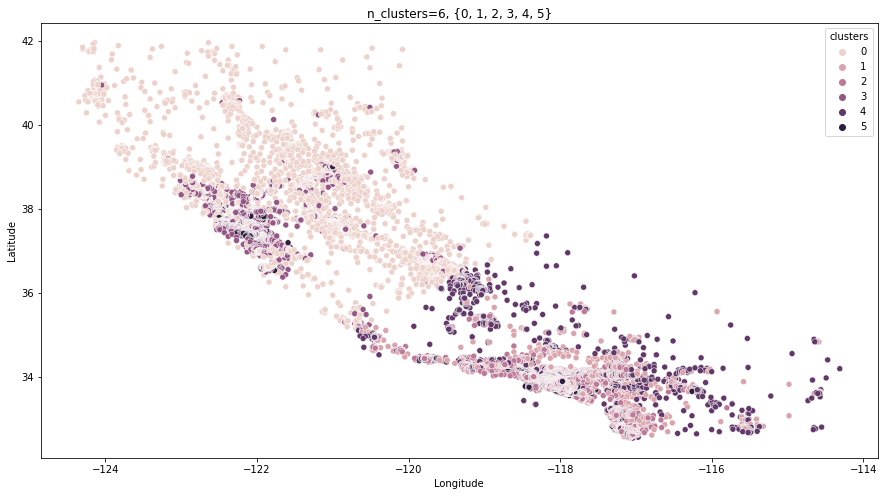

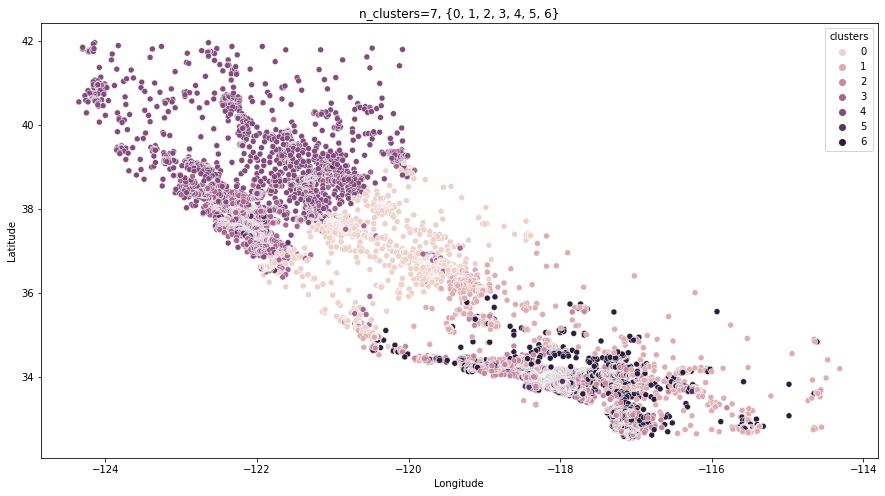

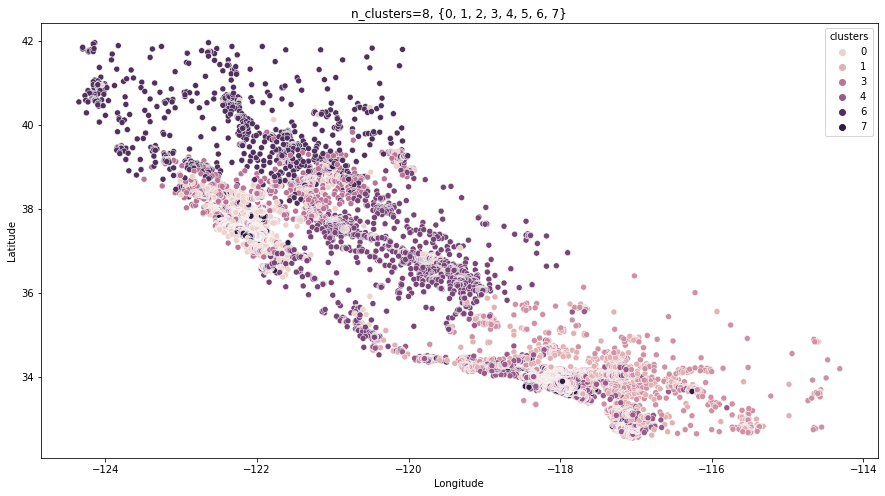

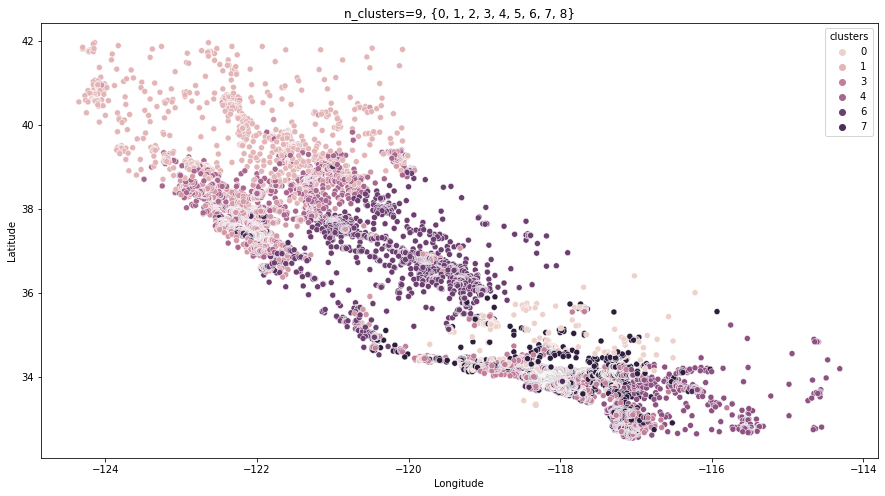

In [20]:
for k in range(2,10):

    model = KMeans(n_clusters=k, random_state=53)
    clusters = model.fit_predict(X)
    X["clusters"] = clusters
    
    plt.figure(figsize=(15,8))
    plt.title(f"n_clusters={k}, {set(clusters)}")
    sns.scatterplot(data=X, x="Longitude", y="Latitude", hue="clusters")
    
plt.show()

### Silhouette

In [23]:
model = KMeans(n_clusters=2)
clusters = model.fit_predict(X)

metrics.silhouette_score(X, clusters)

0.391990782683516

In [26]:
model = KMeans(n_clusters=9)
clusters = model.fit_predict(X)

metrics.silhouette_score(X, clusters)

0.6261477354019345

In [27]:
try_ks = list(range(2,10))
scores = []
for k in try_ks:
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(X)
    score = metrics.silhouette_score(X, clusters)
    scores.append(score)

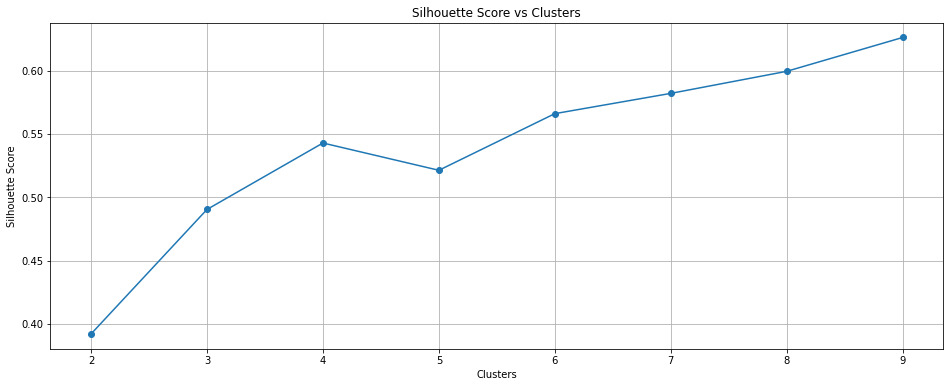

In [33]:
plt.figure(figsize=(16,6))
plt.plot(try_ks, scores, marker='o')
plt.grid()
plt.xlabel("Clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Clusters');